In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import drive
#drive.mount('/content/gdrive',force_remount=True)
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
unemployment = pd.read_csv('gdrive/My Drive/UNRATENSA.csv')
#data.columns
unemployment.head()

,DATE,UNRATENSA
0,1/1/1948,4.0
1,2/1/1948,4.7
2,3/1/1948,4.5
3,4/1/1948,4.0
4,5/1/1948,3.4


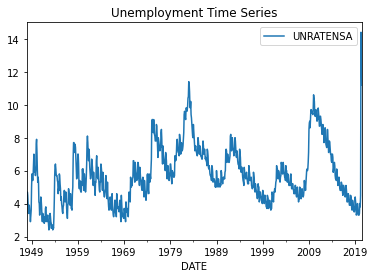

In [7]:
unemployment.index = pd.to_datetime(unemployment.DATE)
unemployment.plot()
plt.title('Unemployment Time Series')
plt.show()

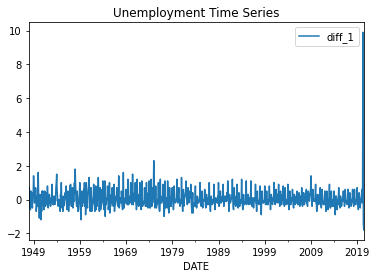

In [9]:
unemployment['diff_1'] = unemployment.UNRATENSA - unemployment.UNRATENSA.shift()
unemployment.plot(y='diff_1')
plt.title('Unemployment Time Series')
plt.show()

In [10]:
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(center=False,window=12).mean()
    rolstd = timeseries.rolling(center=False,window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

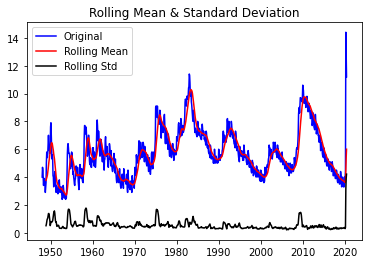

Results of Dickey-Fuller Test:
Test Statistic                  -3.107353
p-value                          0.026014
#Lags Used                      19.000000
Number of Observations Used    850.000000
Critical Value (1%)             -3.438067
Critical Value (5%)             -2.864946
Critical Value (10%)            -2.568584
dtype: float64


In [11]:

test_stationarity(unemployment.UNRATENSA)

In [12]:

model110 = ARIMA(unemployment.diff_1[1:], order=(1,1,0))
model_fit_110 = model110.fit()
print(model_fit_110.summary())
print('Residuals Description')
print(model_fit_110.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  868
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -958.643
Method:                       css-mle   S.D. of innovations              0.730
Date:                Sun, 26 Jul 2020   AIC                           1923.286
Time:                        05:35:35   BIC                           1937.584
Sample:                    03-01-1948   HQIC                          1928.757
                         - 06-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0025      0.018     -0.139      0.890      -0.037       0.032
ar.L1.D.diff_1    -0.4033      0.031    -12.985      0.000      -0.464      -0.342
                                    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [13]:

model111 = ARIMA(unemployment.diff_1[1:], order=(1,1,1))
model_fit_111 = model111.fit()
print(model_fit_111.summary())
print('Residuals Description')
print(model_fit_111.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  868
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -756.923
Method:                       css-mle   S.D. of innovations              0.577
Date:                Sun, 26 Jul 2020   AIC                           1521.846
Time:                        05:36:02   BIC                           1540.911
Sample:                    03-01-1948   HQIC                          1529.141
                         - 06-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2.854e-05   8.11e-05      0.352      0.725      -0.000       0.000
ar.L1.D.diff_1     0.0387      0.034      1.132      0.258      -0.028       0.106
ma.L1.D.diff_1    -1.0000      0.003

In [15]:
model_011 = ARIMA(unemployment.diff_1[1:], order=(0,1,1))
model_fit_011 = model_011.fit()
print(model_fit_011.summary)
print('Residuals Description')
print(model_fit_011.resid.describe())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


<bound method ARMAResults.summary of <statsmodels.tsa.arima_model.ARIMAResults object at 0x7ff16eee7ba8>>
Residuals Description
count    868.000000
mean      -0.005608
std        0.579539
min       -1.823132
25%       -0.312068
50%       -0.111415
75%        0.186558
max        9.886692
dtype: float64


In [16]:
model_210 = ARIMA(unemployment.diff_1[1:], order=(2,1,0))
model_fit_210 = model_210.fit()
print(model_fit_210.summary())
print('Residuals Description')
print(model_fit_210.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.diff_1   No. Observations:                  868
Model:                 ARIMA(2, 1, 0)   Log Likelihood                -916.057
Method:                       css-mle   S.D. of innovations              0.695
Date:                Sun, 26 Jul 2020   AIC                           1840.114
Time:                        05:37:56   BIC                           1859.179
Sample:                    03-01-1948   HQIC                          1847.410
                         - 06-01-2020                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0004      0.012      0.029      0.977      -0.024       0.025
ar.L1.D.diff_1    -0.5525      0.034    -16.486      0.000      -0.618      -0.487
ar.L2.D.diff_1    -0.3614      0.038

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
